# Diabetes Prediction using Machine Learning

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumargh/pimaindiansdiabetescsv")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\kumargh\pimaindiansdiabetescsv\versions\1


In [1]:
# load the pima data
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\Diabetes project\pima.csv",names=["preg","glucose","bp","skin","insulin","bmi","pedigree","age","class"])
df

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.shape

(768, 9)

In [3]:
# display 1st rows
df.head()

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#  display last 5 rows
df.tail()

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# display 5 rows redomly
df.sample(5)

,preg,glucose,bp,skin,insulin,bmi,pedigree,age,class
119,4,99,76,15,51,23.2,0.223,21,0
597,1,89,24,19,25,27.8,0.559,21,0
539,3,129,92,49,155,36.4,0.968,32,1
757,0,123,72,0,0,36.3,0.258,52,1
444,4,117,62,12,0,29.7,0.380,30,1


In [6]:
df.columns


Index(['preg', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age',
       'class'],
      dtype='object')

In [7]:
# display number of people with and without diabetes
df['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

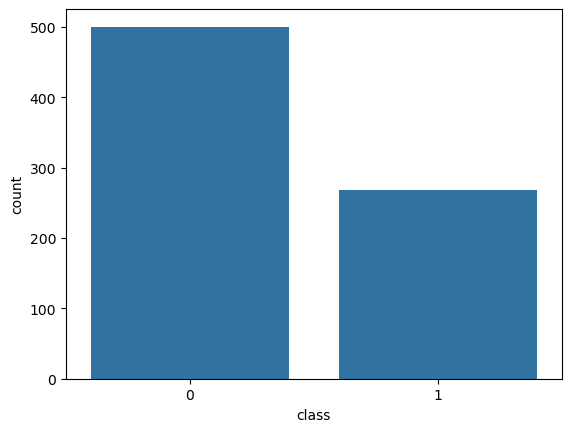

In [8]:
# display this information in a bar chart
import seaborn as sns
sns.countplot(x=df['class'])

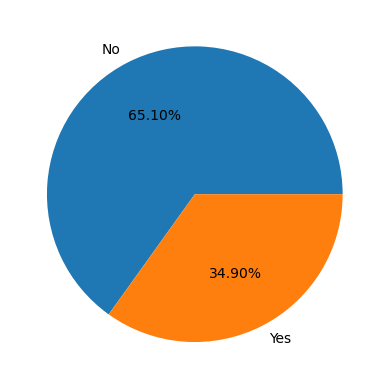

In [9]:
# display the above info in a pie chart
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(),labels=['No','Yes'],autopct="%0.2f%%")
plt.show()

In [10]:
# display the maximum age
df['age'].max()

81

In [11]:
# display the minimum age
df['age'].min()

21

In [12]:
# how many people are there with age <=40 and
len(df.loc[df['age']<=40])

574

In [13]:

# how many people are there with age >=41 and
len(df.loc[df['age']>=41])

194

In [14]:
# how many people with age <=40 but suffering with diabetes
len(df.loc[(df['age']<=40)&(df['class']==1)])
                       

166

In [15]:
# percentage
166/574

0.289198606271777

In [16]:
# how many people with age >=41 but suffering with diabetes
len(df.loc[(df['age']>40)&(df['class']==1)])

102

In [17]:
# percentage
102/194

0.5257731958762887

In [18]:
# display the maximum and minimum value of glucose
df['glucose'].max()


199

In [19]:
df['glucose'].min()

0

In [22]:
# no of people bellow glucose 100
df.loc[df['glucose']<100].__len__()

197

In [23]:
# no of people above glucose 100
df.loc[df['glucose']>=100].__len__()

571

In [24]:
# no of people glucose < 100 with have diabetes
df.loc[(df['glucose']<100)&(df['class']==1)].__len__()

16

In [25]:
# percentage
16/197

0.08121827411167512

In [26]:
# no of people glucose >= 100 with have diabetes
df.loc[(df['glucose']>=100)&(df['class']==1)].__len__()

252

In [27]:
# percentage
252/571

0.4413309982486865

# Handle the missing values

In [28]:
# find missing values
df.isnull().sum()

preg        0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
class       0
dtype: int64

In [29]:
df.loc[df['glucose']==0].__len__()

5

In [30]:
df.loc[df['bp']==0].__len__()

35

In [31]:
df.loc[df['skin']==0].__len__()

227

In [32]:
df.loc[df['insulin']==0].__len__()

374

In [33]:
df.loc[df['bmi']==0].__len__()

11

In [34]:
df.loc[df['pedigree']==0].__len__()

0

In [35]:
df.loc[df['age']==0].__len__()

0

In [36]:
df1=df[['glucose','bp','skin','insulin','bmi']]
df2=df.drop(columns=['glucose','bp','skin','insulin','bmi'])

In [37]:
df1

,glucose,bp,skin,insulin,bmi
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [38]:
df2

,preg,pedigree,age,class
0,6,0.627,50,1
1,1,0.351,31,0
2,8,0.672,32,1
3,1,0.167,21,0
4,0,2.288,33,1
...,...,...,...,...
763,10,0.171,63,0
764,2,0.340,27,0
765,5,0.245,30,0
766,1,0.349,47,1


In [39]:
# convert the zero values in df1 to NaN
import numpy as np
df1.replace(0,np.NaN,inplace=True)
df1

C:\Users\HP\AppData\Local\Temp\ipykernel_15852\1917349144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace(0,np.NaN,inplace=True)


,glucose,bp,skin,insulin,bmi
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [40]:
df1.isnull().sum()  # missing values

glucose      5
bp          35
skin       227
insulin    374
bmi         11
dtype: int64

In [41]:
# fill the missing values by the mean value of specific column
df1.fillna(df1.mean(),inplace=True)
df1.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_15852\3775048490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(df1.mean(),inplace=True)


glucose    0
bp         0
skin       0
insulin    0
bmi        0
dtype: int64

In [42]:
# concat df2 with df1 
import pandas as pd
df3=pd.concat([df1,df2],axis=1)
df3


,glucose,bp,skin,insulin,bmi,preg,pedigree,age,class
0,148.0,72.0,35.00000,155.548223,33.6,6,0.627,50,1
1,85.0,66.0,29.00000,155.548223,26.6,1,0.351,31,0
2,183.0,64.0,29.15342,155.548223,23.3,8,0.672,32,1
3,89.0,66.0,23.00000,94.000000,28.1,1,0.167,21,0
4,137.0,40.0,35.00000,168.000000,43.1,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,10,0.171,63,0
764,122.0,70.0,27.00000,155.548223,36.8,2,0.340,27,0
765,121.0,72.0,23.00000,112.000000,26.2,5,0.245,30,0
766,126.0,60.0,29.15342,155.548223,30.1,1,0.349,47,1


In [43]:
df3.isnull().sum()

glucose     0
bp          0
skin        0
insulin     0
bmi         0
preg        0
pedigree    0
age         0
class       0
dtype: int64

In [44]:
# display the corelation matrix
df3.corr()

,glucose,bp,skin,insulin,bmi,preg,pedigree,age,class
glucose,1.000000,0.218367,0.192991,0.420157,0.230941,0.127911,0.137060,0.266534,0.492928
bp,0.218367,1.000000,0.192816,0.072517,0.281268,0.208522,-0.002763,0.324595,0.166074
skin,0.192991,0.192816,1.000000,0.158139,0.542398,0.082989,0.100966,0.127872,0.215299
insulin,0.420157,0.072517,0.158139,1.000000,0.166586,0.056027,0.098634,0.136734,0.214411
bmi,0.230941,0.281268,0.542398,0.166586,1.000000,0.021565,0.153400,0.025519,0.311924
preg,0.127911,0.208522,0.082989,0.056027,0.021565,1.000000,-0.033523,0.544341,0.221898
pedigree,0.137060,-0.002763,0.100966,0.098634,0.153400,-0.033523,1.000000,0.033561,0.173844
age,0.266534,0.324595,0.127872,0.136734,0.025519,0.544341,0.033561,1.000000,0.238356
class,0.492928,0.166074,0.215299,0.214411,0.311924,0.221898,0.173844,0.238356,1.000000


<Axes: >

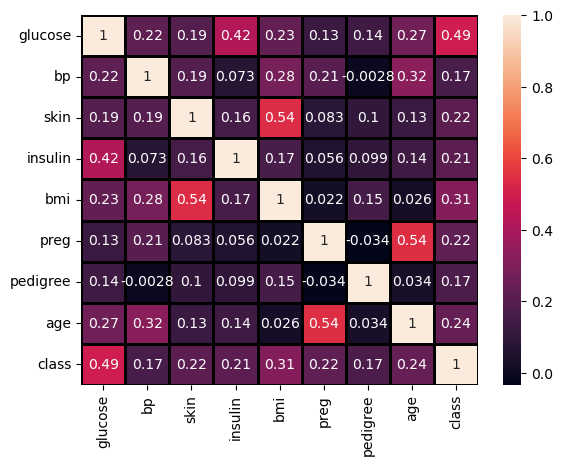

In [45]:
# show the co-relation using a heatmap
import seaborn as sns
sns.heatmap(df3.corr(),annot=True,linecolor="black",linewidth=2)

In [46]:
# seperate input and output
x=df3.drop(columns=['class'])
y=df3['class']

In [47]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [48]:
# split the data set into 2 parts. one for training and another part for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
x_train  # input 80% data

,glucose,bp,skin,insulin,bmi,preg,pedigree,age
442,117.0,64.0,27.00000,120.000000,33.2,4,0.230,24
477,114.0,76.0,17.00000,110.000000,23.8,7,0.466,31
120,162.0,76.0,56.00000,100.000000,53.2,0,0.759,25
754,154.0,78.0,32.00000,155.548223,32.4,8,0.443,45
414,138.0,60.0,35.00000,167.000000,34.6,0,0.534,21
...,...,...,...,...,...,...,...,...
574,143.0,86.0,30.00000,330.000000,30.1,1,0.892,23
672,68.0,106.0,23.00000,49.000000,35.5,10,0.285,47
732,174.0,88.0,37.00000,120.000000,44.5,2,0.646,24
340,130.0,70.0,13.00000,105.000000,25.9,1,0.472,22


In [50]:
x_train

,glucose,bp,skin,insulin,bmi,preg,pedigree,age
442,117.0,64.0,27.00000,120.000000,33.2,4,0.230,24
477,114.0,76.0,17.00000,110.000000,23.8,7,0.466,31
120,162.0,76.0,56.00000,100.000000,53.2,0,0.759,25
754,154.0,78.0,32.00000,155.548223,32.4,8,0.443,45
414,138.0,60.0,35.00000,167.000000,34.6,0,0.534,21
...,...,...,...,...,...,...,...,...
574,143.0,86.0,30.00000,330.000000,30.1,1,0.892,23
672,68.0,106.0,23.00000,49.000000,35.5,10,0.285,47
732,174.0,88.0,37.00000,120.000000,44.5,2,0.646,24
340,130.0,70.0,13.00000,105.000000,25.9,1,0.472,22


In [51]:
x_train 

,glucose,bp,skin,insulin,bmi,preg,pedigree,age
442,117.0,64.0,27.00000,120.000000,33.2,4,0.230,24
477,114.0,76.0,17.00000,110.000000,23.8,7,0.466,31
120,162.0,76.0,56.00000,100.000000,53.2,0,0.759,25
754,154.0,78.0,32.00000,155.548223,32.4,8,0.443,45
414,138.0,60.0,35.00000,167.000000,34.6,0,0.534,21
...,...,...,...,...,...,...,...,...
574,143.0,86.0,30.00000,330.000000,30.1,1,0.892,23
672,68.0,106.0,23.00000,49.000000,35.5,10,0.285,47
732,174.0,88.0,37.00000,120.000000,44.5,2,0.646,24
340,130.0,70.0,13.00000,105.000000,25.9,1,0.472,22


In [52]:
x_test.shape

(154, 8)

In [53]:
y_train.shape   # output of x train

(614,)

In [54]:
y_test.shape

(154,)

In [55]:
# implementn logistic Regression model for training
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
# train the model by using 80% training data
L.fit(x_train,y_train)

LogisticRegression()

In [56]:
# test the model by using testing data
y_pred_lg=L.predict(x_test)
y_pred_lg  # predict ans of y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [57]:
# find accuracy
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(y_test,y_pred_lg)
acc_lg=round(acc_lg*100,2)
print("accuracy in logistic regression is ",acc_lg, "%")

accuracy in logistic regression is  75.32 %


In [58]:
# implement k nearest neignbors model

In [59]:
from sklearn.neighbors import KNeighborsClassifier
K= KNeighborsClassifier(n_neighbors=5)
# train the model
K.fit(x_train,y_train)
# test the model
y_pred_knn=K.predict(x_test)
# find accuracy
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_pred_knn)
acc_knn=round(acc_knn*100,2)
print("accuracy of KNN model is ",acc_knn)

accuracy of KNN model is  67.53


In [60]:
# apply Decission Tree model
from sklearn.tree import DecisionTreeClassifier
D= DecisionTreeClassifier
# train the model
K.fit(x_train,y_train)
# test the model
y_pred_dt=K.predict(x_test)
# find accuracy
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_pred_dt)
acc_dt=round(acc_dt*100,2)
print("accuracy of decision Tree model is ",acc_dt)

accuracy of decision Tree model is  67.53


In [61]:
 ##########################################################################################

In [62]:
# load the pima data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\Diabetes project\pima.csv",names=["preg","glucose","bp","skin","insulin","bmi","pedigree","age","class"])

df1=df[['glucose','bp','skin','insulin','bmi']]
df2=df.drop(columns=['glucose','bp','skin','insulin','bmi'])

# convert the zero values in df1 to NaN
import numpy as np
df1.replace(0,np.NaN,inplace=True)

# fill the missing values by the mean value of specific column
df1.fillna(df1.mean(),inplace=True)
df1.isnull().sum()

# concat df2 with df1 
import pandas as pd
df3=pd.concat([df1,df2],axis=1)

# seperate input and output
x=df3.drop(columns=['class'])
y=df3['class']

# split the data set into 2 parts. one for training and another part for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [62]:
# load the pima data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\Diabetes project\pima.csv",names=["preg","glucose","bp","skin","insulin","bmi","pedigree","age","class"])

df1=df[['glucose','bp','skin','insulin','bmi']]
df2=df.drop(columns=['glucose','bp','skin','insulin','bmi'])

# convert the zero values in df1 to NaN
import numpy as np
df1.replace(0,np.NaN,inplace=True)

# fill the missing values by the mean value of specific column
df1.fillna(df1.mean(),inplace=True)
df1.isnull().sum()

# concat df2 with df1 
import pandas as pd
df3=pd.concat([df1,df2],axis=1)

# seperate input and output
x=df3.drop(columns=['class'])
y=df3['class']

# split the data set into 2 parts. one for training and another part for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



# implementn logistic Regression model for training

In [63]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
# train the model by using 80% training data
L.fit(x_train,y_train)

# test the model by using testing data
y_pred_lg=L.predict(x_test)

# find accuracy
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(y_test,y_pred_lg)
acc_lg=round(acc_lg*100,2)
print("accuracy in logistic regression is ",acc_lg, "%")

accuracy in logistic regression is  70.78 %


# implement k nearest neignbors model

In [64]:
from sklearn.neighbors import KNeighborsClassifier
K= KNeighborsClassifier(n_neighbors=5)
# train the model
K.fit(x_train,y_train)
# test the model
y_pred_knn=K.predict(x_test)
# find accuracy
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_pred_knn)
acc_knn=round(acc_knn*100,2)
print("accuracy of KNN model is ",acc_knn)

accuracy of KNN model is  61.69


# Implement Decission Tree model

In [65]:
# apply Decission Tree model
from sklearn.tree import DecisionTreeClassifier
D= DecisionTreeClassifier
# train the model
K.fit(x_train,y_train)
# test the model
y_pred_dt=K.predict(x_test)
# find accuracy
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_pred_dt)
acc_dt=round(acc_dt*100,2)
print("accuracy of decision Tree model is ",acc_dt)

accuracy of decision Tree model is  61.69


# implement random forest model

In [67]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier()
# train the model
R.fit(x_train,y_train)
# test the model
y_pred_rf=R.predict(x_test)
# find accuracy
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_pred_rf)
acc_rf=round(acc_rf*100,2)
print("accuracy of random forest model is ",acc_rf)


accuracy of random forest model is  70.78


In [68]:
print(acc_lg,acc_knn,acc_dt,acc_rf)

70.78 61.69 61.69 70.78


In [69]:
df3.columns

Index(['glucose', 'bp', 'skin', 'insulin', 'bmi', 'preg', 'pedigree', 'age',
       'class'],
      dtype='object')

In [ ]:
# compare import matplotlib.pyplot as plt
models=["LG","KNN","DT","RF"]
accuracy=[acc_lg,acc_knn,acc_dt,acc_rf]
plt.bar(models,accuracy,color=["orange","green","yellow","blue"])

# @@@@@@@@@@@@@@@@@@@@@#########@@@@@@@@@@@@@@@@@@@@@#

# Devlope the GUI

In [ ]:

# load the pima data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\Diabetes project\pima.csv",names=["preg","glucose","bp","skin","insulin","bmi","pedigree","age","class"])

df1=df[['glucose','bp','skin','insulin','bmi']]
df2=df.drop(columns=['glucose','bp','skin','insulin','bmi'])

# convert the zero values in df1 to NaN
import numpy as np
df1.replace(0,np.NaN,inplace=True)

# fill the missing values by the mean value of specific column
df1.fillna(df1.mean(),inplace=True)
df1.isnull().sum()

# concat df2 with df1 
import pandas as pd
df3=pd.concat([df1,df2],axis=1)

# seperate input and output
x=df3.drop(columns=['class'])
y=df3['class']

# split the data set into 2 parts. one for training and another part for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=5)


def lg():
    global L
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.linear_model import LogisticRegression
    L=LogisticRegression()
    # train the model by using 80% training data
    L.fit(x_train,y_train)
    
    # test the model by using testing data
    y_pred_lg=L.predict(x_test)
    
    # find accuracy
    from sklearn.metrics import accuracy_score
    acc_lg=accuracy_score(y_test,y_pred_lg)
    acc_lg=round(acc_lg*100,2)
    m.showinfo(title="LG",message="accuracy is "+ str(acc_lg))
    print("accuracy in logistic regression is ",acc_lg, "%")
    

def knn():
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.neighbors import KNeighborsClassifier
    K= KNeighborsClassifier(n_neighbors=5)
    # train the model
    K.fit(x_train,y_train)
    # test the model
    y_pred_knn=K.predict(x_test)
    # find accuracy
    from sklearn.metrics import accuracy_score
    acc_knn=accuracy_score(y_test,y_pred_knn)
    acc_knn=round(acc_knn*100,2)
    m.showinfo(title="KNN",message="accuracy is "+ str(acc_knn))
 

def dt():
    import warnings
    warnings.filterwarnings('ignore')
    # apply Decission Tree model
    from sklearn.tree import DecisionTreeClassifier
    D= DecisionTreeClassifier
    # train the model
    K.fit(x_train,y_train)
    # test the model
    y_pred_dt=K.predict(x_test)
    # find accuracy
    from sklearn.metrics import accuracy_score
    acc_dt=accuracy_score(y_test,y_pred_dt)
    acc_dt=round(acc_dt*100,2)
    m.showinfo(title="DT",message="accuracy is "+ str(acc_dt))
    
def rf():
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestClassifier
    R=RandomForestClassifier()
    # train the model
    R.fit(x_train,y_train)
    # test the model
    y_pred_rf=R.predict(x_test)
    # find accuracy
    from sklearn.metrics import accuracy_score
    acc_rf=accuracy_score(y_test,y_pred_rf)
    acc_rf=round(acc_rf*100,2)
    m.showinfo(title="RF",message="accuracy is "+ str(acc_rf))

def compare():
    # compare import matplotlib.pyplot as plt
    models=["LG","KNN","DT","RF"]
    accuracy=[acc_lg,acc_knn,acc_dt,acc_rf]
    plt.bar(models,accuracy,color=["orange","green","yellow","blue"])
    plt.show()

def submit():
    glucose=float(Eglucose.get())
    bp=float(Ebp.get())
    skin=float(Eskin.get())
    insulin=float(Einsulin.get())
    bmi=float(Ebmi.get())
    preg=float(Epreg.get())
    pedigree=float(Epedigree.get())
    age=float(Eage.get()) 

    # print result eiter 0 (no diabetes) or 1(have diabetes)
    result=L.predict([[glucose,bp,skin,insulin,bmi,preg,pedigree,age]])

    if result[0]==0:
        msg= "you have no Diabetes"
    else:
        msg="you have Diabetes"

    m.showinfo(title="Diabetes Prediction Result",message=msg)

def reset():
    Eglucose.delete(0,END)
    Ebp.delete(0,END)
    Eskin.delete(0,END)
    Ebmi.delete(0,END)
    Einsulin.delete(0,END)
    Epreg.delete(0,END)
    Epedigree.delete(0,END)
    Eage.delete(0,END)
   

from tkinter import *
import tkinter.messagebox as m
w=Tk()
w.title("diabetes prediction")
################# 1st row ###################
L1=Label(w,text="Diabetes Prediction Using Machine Learning",font=("arial",20,"bold"),bg="pink")
L1.grid(row=1,column=1,columnspan=4)

################# 2nd row ###################
Blg=Button(w,text="LG",font=("arial",15,"bold"),command=lg)
Bknn=Button(w,text="KNN",font=("arial",15,"bold"),command=knn)
Bdt=Button(w,text="DT",font=("arial",15,"bold"),command=dt)
Brf=Button(w,text="RF",font=("arial",15,"bold"),command=rf)
Blg.grid(row=2,column=1)
Bknn.grid(row=2,column=2)
Bdt.grid(row=2,column=3)
Brf.grid(row=2,column=4)

################# 3rd row ###################
Bcmp=Button(w,text="COMPARE",font=("arial",15,"bold"),command=compare)
Bcmp.grid(row=3,column=2,columnspan=2)

################# 4th row ###################
L2=Label(w,text="Predict for a new person",font=("arial",20,"bold"),bg="pink")
L2.grid(row=4,column=1,columnspan=4)

################# 5th row ###################
Lglucose=Label(w,text="GLUSOSE",font=("arial",15,"bold"))
Eglucose=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")
Lbp=Label(w,text="Blood Pressure",font=("arial",15,"bold"))
Ebp=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")

Lglucose.grid(row=5,column=1)
Eglucose.grid(row=5,column=2)

Lbp.grid(row=5,column=3)
Ebp.grid(row=5,column=4)

######### 6th row ###############
Lskin=Label(w,text="SKIN",font=("arial",15,"bold"))
Eskin=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")
Linsulin=Label(w,text="Insulin",font=("arial",15,"bold"))
Einsulin=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")

Lskin.grid(row=6,column=1)
Eskin.grid(row=6,column=2)

Linsulin.grid(row=6,column=3)
Einsulin.grid(row=6,column=4)

################# 7th row ###################
Lbmi=Label(w,text="BMI",font=("arial",15,"bold"))
Ebmi=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")
Lpreg=Label(w,text="preg",font=("arial",15,"bold"))
Epreg=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")

Lbmi.grid(row=7,column=1)
Ebmi.grid(row=7,column=2)

Lpreg.grid(row=7,column=3)
Epreg.grid(row=7,column=4)

################# 8th row ###################
Lpedigree=Label(w,text="Pedigree",font=("arial",15,"bold"))
Epedigree=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")
Lage=Label(w,text="Age",font=("arial",15,"bold"))
Eage=Entry(w,font=("arial",15,"bold"),width=10,bg="yellow")

Lpedigree.grid(row=8,column=1)
Epedigree.grid(row=8,column=2)

Lage.grid(row=8,column=3)
Eage.grid(row=8,column=4)

#################### 9th row #################
Bsub=Button(w,text="SUBMIT",font=("arial",15,"bold"),command=submit)
Bres=Button(w,text="RESET",font=("arial",15,"bold"),command=reset)
Bsub.grid(row=9,column=1,columnspan=2)
Bres.grid(row=9,column=3,columnspan=2)
w.mainloop()